# Preprocesamiento de las imagenes de mariposas 

## 1. Importar las librerias necesarias


In [1]:
# Librerias necesarias para el preprocesamiento de imagenes de mariposas
import cv2
import os
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress tracking


# 2. Identificar las 30 especies con mas muestras


In [2]:

# Cargar el archivo CSV que contiene las etiquetas de las imágenes
df = pd.read_csv("../butterflies/BUTTERFLIES.csv")

# Contar el número de muestras por especie
species_counts = df["labels"].value_counts()

# Obtener las 30 especies con más muestras
top_species = species_counts.head(30).index.tolist()

print("Top 30 species with the most samples:")
print(top_species)



Top 30 species with the most samples:
['MOURNING CLOAK', 'GREEN HAIRSTREAK', 'BROWN ARGUS', 'BROOKES BIRDWING', 'SLEEPY ORANGE', 'CHALK HILL BLUE', 'HUMMING BIRD HAWK MOTH', 'WHITE LINED SPHINX MOTH', 'ATALA', 'BROWN SIPROETA', 'ARCIGERA FLOWER MOTH', 'BANDED ORANGE HELICONIAN', 'SCARCE SWALLOW', 'CRECENT', 'HERCULES MOTH', 'MILBERTS TORTOISESHELL', 'ROSY MAPLE MOTH', 'RED CRACKER', 'ORANGE TIP', 'BANDED TIGER MOTH', 'Iphiclus sister', 'CHECQUERED SKIPPER', 'EASTERN PINE ELFIN', 'EMPEROR GUM MOTH', 'DANAID EGGFLY', 'GREAT JAY', 'COPPER TAIL', 'EASTERN COMA', 'CLEOPATRA', 'BIRD CHERRY ERMINE MOTH']


In [3]:

# Reducir la dimensión de las imágenes a 128x128 píxeles 
def resize_image(image_path, size=(224, 224)):
    """
    Redimensiona una imagen a un tamaño específico.
    
    :param image_path: Ruta de la imagen a redimensionar.
    :param size: Tupla con el nuevo tamaño (ancho, alto).
    :return: Imagen redimensionada.
    """
    
    image = cv2.imread(image_path)
    if image is not None:
        resized_image = cv2.resize(image, size)
        return resized_image
    else:
        print(f"Error al cargar la imagen: {image_path}")
        return None

# 3. Obtener las rutas de las imagenes de mariposas de cada dataset

In [4]:
all_files = {
    'train': [],
    'valid': [],
    'test': []
}

for  dir in ['train', 'valid', 'test']:
    test_dir = os.path.join('..\\butterflies', dir + '\\')
    
    for root, dirs, files in os.walk(test_dir):

        for file in files:
            if file.endswith('.jpg') and root.split('\\')[-1] in top_species:
                all_files[dir].append(os.path.join(root, file))

print(len(all_files['test']), "test files")
print(len(all_files['train']), "train files")
print(len(all_files['valid']), "validation files \n")

# Seleccionar 20 imágenes de entrenamiento y todas las de test para cada especie
train_files = []
test_files = []
for species in top_species:
    species_train_files = [f for f in all_files['train'] if species in f]
    species_test_files = [f for f in all_files['test'] if species in f]
    
    test_files.extend(species_train_files[:20])  # Toma las primeras 20 de training
    test_files.extend(species_test_files)  # Toma todas las de test

    train_files.extend(species_train_files[20:])  # Toma el resto de training

valid_files = all_files['valid']  # Mantener todas las de validación

print(len(test_files), "test files after selection")
print(len(train_files), "train files after selection")
print(len(valid_files), "validation files after selection\n")

# print sample image
print("Sample image from test set:", test_files[0])

150 test files
4293 train files
150 validation files 

750 test files after selection
3693 train files after selection
150 validation files after selection

Sample image from test set: ..\butterflies\train\MOURNING CLOAK\001.jpg


# 4. Crear un dataset con las nuevas imagenes con resize si corresponde

In [5]:
# Procesar las imágenes de prueba
cont = 0
for file in tqdm(test_files, desc="Processing Test Images", unit="image"):

    # Obtener el nombre de la especie y el número del archivo
    species = file.split('\\')[-2]
    num = cont
    file_name = f"{species}_{num}.jpg"

    resized_image = resize_image(file)

    if resized_image is not None:
        # Guardar la imagen en otra ubicación
        output_dir = os.path.join('../data/test/', species)
        os.makedirs(output_dir, exist_ok=True)
        cv2.imwrite(os.path.join(output_dir, file_name), resized_image)
    else:
        print(f"Skipping file {file} due to loading error.")

    cont += 1


# Procesar las imágenes de entrenamiento
cont = 0
for file in tqdm(train_files, desc="Processing Train Images", unit="image"):
    # Obtener el nombre de la especie y el número del archivo
    species = file.split('\\')[-2]
    num = cont
    file_name = f"{species}_{num}.jpg"

    resized_image = resize_image(file)

    if resized_image is not None:
        # Guardar la imagen en otra ubicación
        output_dir = os.path.join('../data/train/', species)
        os.makedirs(output_dir, exist_ok=True)
        cv2.imwrite(os.path.join(output_dir, file_name), resized_image)
    else:
        print(f"Skipping file {file} due to loading error.")

    cont += 1

# Procesar las imágenes de validación
cont = 0
for file in tqdm(valid_files, desc="Processing Validation Images", unit="image"):
    # Obtener el nombre de la especie y el número del archivo
    species = file.split('\\')[-2]
    num = cont
    file_name = f"{species}_{num}.jpg"

    resized_image = resize_image(file)

    if resized_image is not None:
        # Guardar la imagen en otra ubicación
        output_dir = os.path.join('../data/valid/', species)
        os.makedirs(output_dir, exist_ok=True)
        cv2.imwrite(os.path.join(output_dir, file_name), resized_image)
    else:
        print(f"Skipping file {file} due to loading error.")

    cont += 1


# Imprimir el número total de imágenes procesadas
print(f"Total processed images: {len(test_files) + len(train_files) + len(valid_files)}")
print("Preprocessing completed successfully.")



Processing Test Images:   0%|          | 0/750 [00:00<?, ?image/s]

Processing Validation Images: 100%|██████████| 150/150 [00:01<00:00, 100.00image/s]

Total processed images: 4593
Preprocessing completed successfully.


# 5. Ejemplo de visualizacion de las imagenes

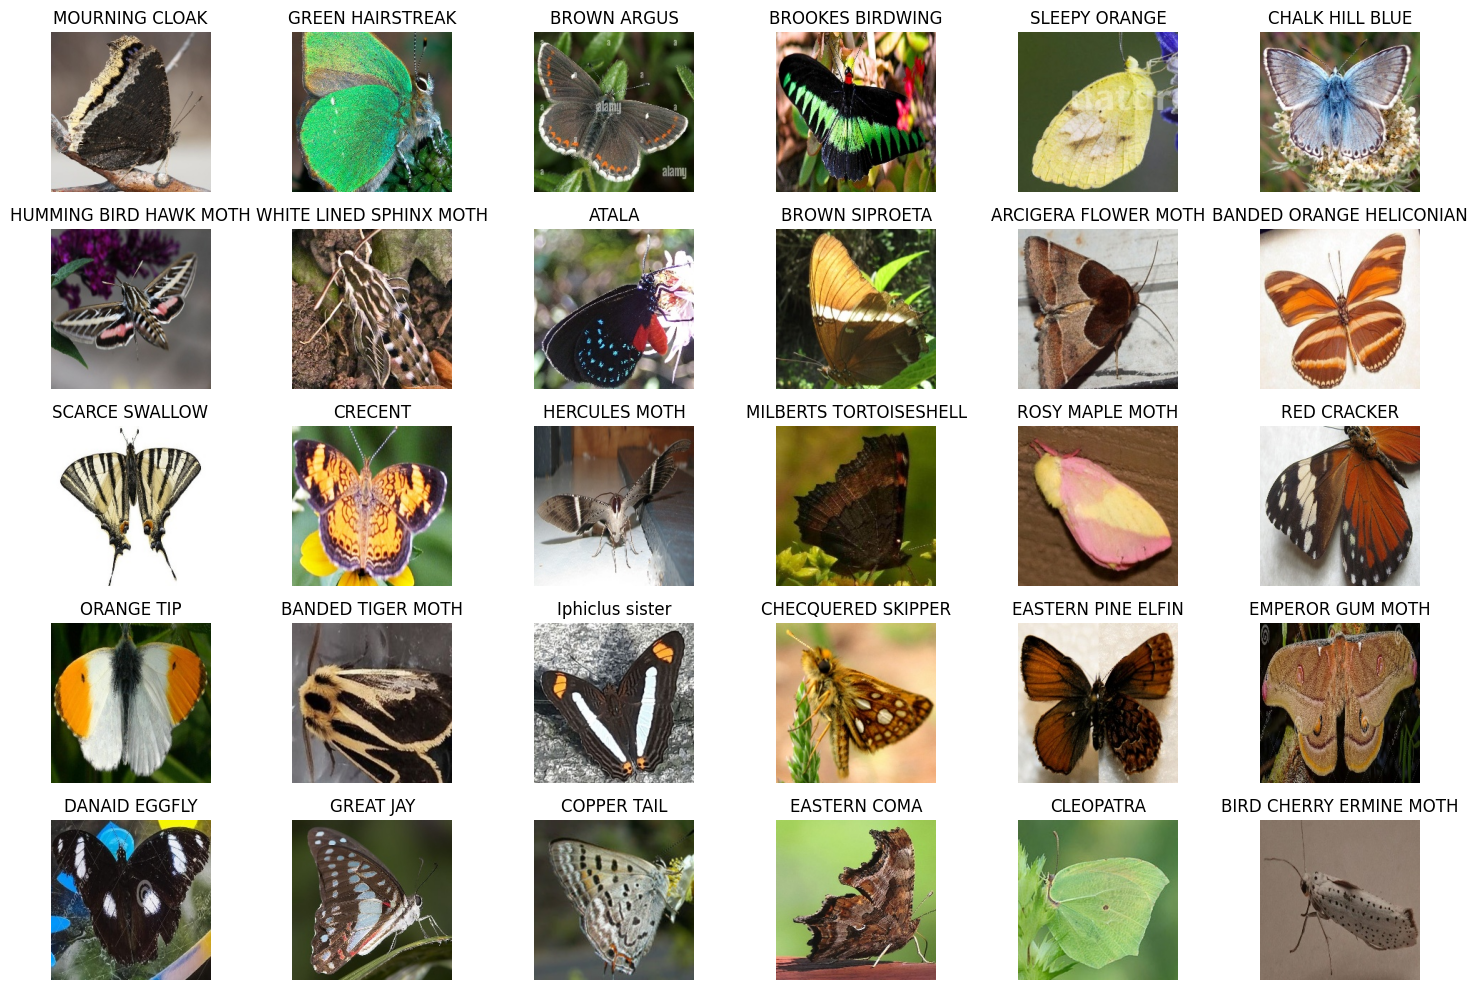

In [6]:
import matplotlib.pyplot as plt
def show_sample_images(files, num_samples=1):
    species_images = {}
    
    for file in files:
        species = file.split('\\')[-2]
        if species not in species_images:
            species_images[species] = []
        species_images[species].append(file)

    plt.figure(figsize=(15, 10))
    for i, (species, images) in enumerate(species_images.items()):
        if len(images) > 0:
            img_path = images[0]  # Show the first image of each species
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
            plt.subplot(5, 6, i + 1)  # Adjust the grid size as needed
            plt.imshow(img)
            plt.title(species)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Show sample images from the test set
show_sample_images(test_files, num_samples=1)